In [99]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from pylab import *
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [100]:
CarSales=pd.read_csv("C:/Users/Espin/Documents/GitHub/FinalProject/Data/Car-Sales-Data (1).csv")

In [101]:
CarSales.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [102]:
CarSales.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [23]:
## Check for missing values
## check for outliers

In [103]:
##Checking for missing values
CarSales.isnull()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False,False


In [106]:
CarSales.isnull().sum()


Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [105]:
CarSales= CarSales.dropna(axis = 0)

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

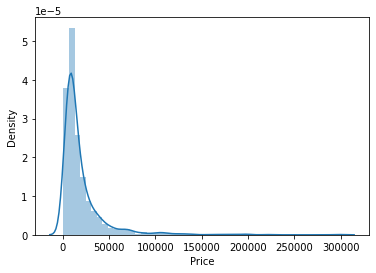

In [107]:
#Checking for outliers
#create a histogram
sns.distplot(CarSales ['Price']) 


AttributeError: 'DataFrame' object has no attribute 'get_influence'

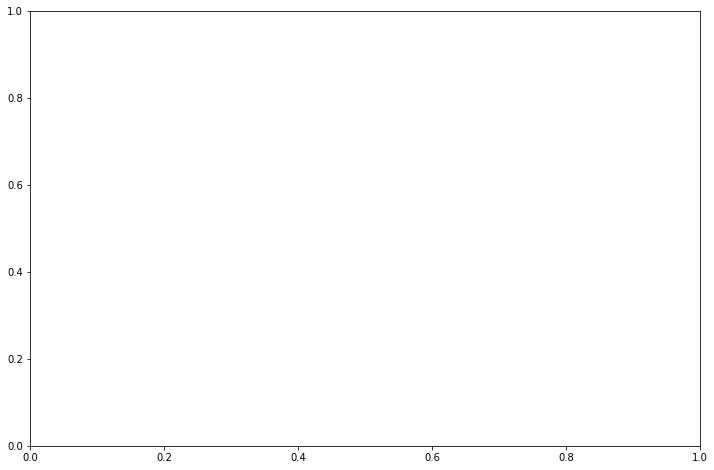

In [108]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(CarSales, alpha = .05, ax = ax, criterion="Price")

In [ ]:
#unable to find outliers 

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

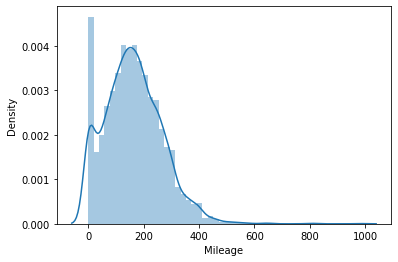

In [109]:
sns.distplot(CarSales ['Mileage'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

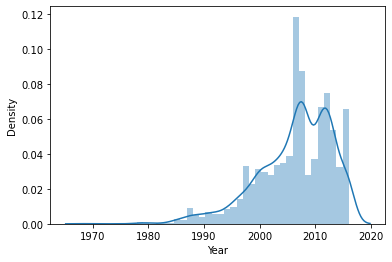

In [110]:
sns.distplot(CarSales ['Year'])

In [111]:
CarSales.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
#checking for assumptions

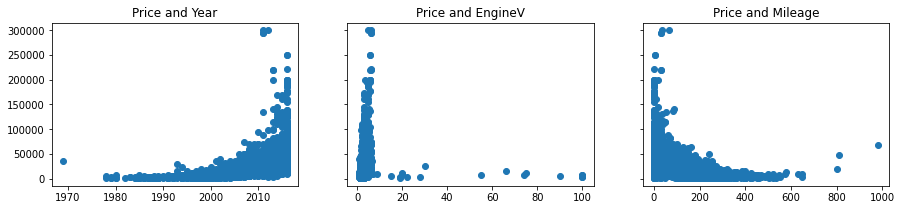

In [112]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter (CarSales['Year'], CarSales['Price'])
ax1.set_title('Price and Year')
ax2.scatter (CarSales['EngineV'], CarSales['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter (CarSales['Mileage'], CarSales['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [ ]:
# no liener patterns no need to run a regression. In order to proceed with the regression, we first need to transform one or more variables. I did a log-transformation on Price and re-created the same scatterplots with logPrice on the y-axis instead of Price.

In [113]:
log_price = np.log(CarSales['Price'])
CarSales['log_Price'] = log_price
CarSales

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,8.987197


In [114]:
CarSales['logPrice'] = np.log(CarSales.Price)
CarSales.drop('Price', axis = 1, inplace = True)

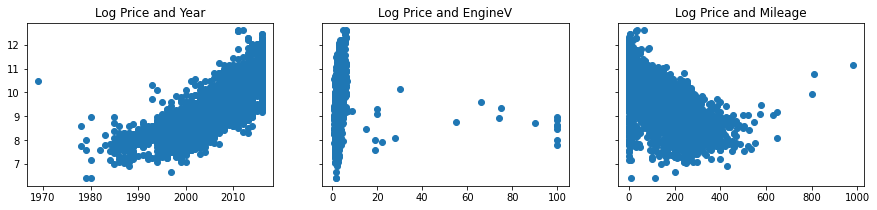

In [115]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter (CarSales['Year'], CarSales['log_Price'])
ax1.set_title('Log Price and Year')
ax2.scatter (CarSales['EngineV'], CarSales['log_Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter (CarSales['Mileage'], CarSales['log_Price'])
ax3.set_title('Log Price and Mileage')

plt.show() # a Linear Pattern in all plots now

In [ ]:
#drop price since its not longer needed 

In [116]:
CarSales= CarSales.drop(['log_Price'], axis = 1) 

In [117]:
CarSales.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,logPrice
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


In [118]:
CarSales.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'logPrice'], dtype=object)

In [ ]:
#test for multicollinearity

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = CarSales[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif

,VIF,features
0,3.481307,Mileage
1,3.748134,Year
2,1.314535,EngineV


In [ ]:
## keep as it is since there is no high correlation

In [120]:
CarSales.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'logPrice'], dtype=object)

In [122]:
CarSales.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,logPrice
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


In [ ]:
## creating dummies variables to see if data indicates whether a separate categorical variable takes on a specific value

In [123]:
data_with_dummies = pd.get_dummies (data_no_multicollinearity, drop_first = True)

In [124]:
data_with_dummies.head()

,Mileage,EngineV,log_Price,logPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,8.342840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,8.974618,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,9.495519,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#rearrange columns for redundant information.

In [125]:
data_with_dummies.columns.values


array(['Mileage', 'EngineV', 'log_Price', 'logPrice', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_324',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5', 'Model_5 Series', 'Model_5 Series GT', 'Model_520',
       'Model_523', 'Model_524', 'Model_525', 'Model_528', 'Model_530',
       'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 

In [126]:
cols = ['log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [127]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,8.987197,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [128]:
targets = data_preprocessed['log_Price']
inputs = data_preprocessed.drop(['log_Price'], axis=1)

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [130]:
inputs_scaled = scaler.transform(inputs)

In [ ]:
## Train split test to ensure that both the train and test sets have the proportion of examples

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train, x_test, y_train, y_test = train_test_split (inputs_scaled, targets, test_size = 0.2, random_state=365)

In [ ]:
#creat regrassion to predict the output

In [133]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [134]:
y_hat = reg.predict(x_train)

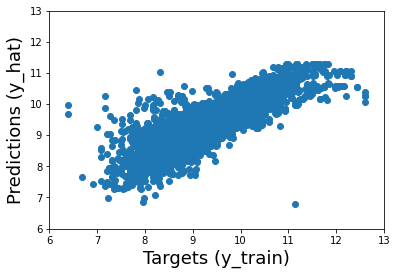

In [135]:
plt.scatter(y_train, y_hat) ## Plot the observed and the predicted targets
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
# finding weight and bias

In [136]:
reg.intercept_ #bias

9.409171443149

In [137]:
reg.coef_ # weights

array([-0.47446855,  0.00929861,  0.0250025 ,  0.07277888, -0.17287102,
       -0.22454904, -0.06240835, -0.13786903, -0.24308666, -0.14285266,
       -0.32032512, -0.1978928 , -0.25351932, -0.11691672, -0.03401037,
       -0.11967096,  0.32503702])

In [138]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary


,Features,Weights
0,Mileage,-0.474469
1,EngineV,0.009299
2,Brand_BMW,0.025003
3,Brand_Mercedes-Benz,0.072779
4,Brand_Mitsubishi,-0.172871
5,Brand_Renault,-0.224549
6,Brand_Toyota,-0.062408
7,Brand_Volkswagen,-0.137869
8,Body_hatch,-0.243087
9,Body_other,-0.142853


In [ ]:
# get my mean , min, and std

In [139]:
CarSales.describe()

,Mileage,EngineV,Year,logPrice
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,163.572174,2.764586,2006.379627,9.409665
std,103.394703,4.935941,6.695595,0.933136
min,0.000000,0.600000,1969.000000,6.396930
25%,90.000000,1.800000,2003.000000,8.853523
50%,158.000000,2.200000,2007.000000,9.350102
75%,230.000000,3.000000,2012.000000,9.994242
max,980.000000,99.990000,2016.000000,12.611538
